In [1]:
from numpy import array

In [2]:
anisotropy_row = array([0.219, 0.202, 0.186, 0.169, 0.152, 0.095, 0.077, 0.065, 0.065, 0.048])
arp23_concentration_row = array([6, 3, 1.5, 0.75, 0.375, 0.125, 0.0625, 0.0625 / 2, 0.0625 / 4, 0])

In [3]:
%matplotlib inline
from matplotlib.pyplot import subplots

In [4]:
from scipy.optimize import curve_fit
from numpy import sqrt

In [5]:
def dna_anisotropy(arp23_concentration, dissociation_constant, min_anisotropy, max_anisotropy):
    anisotropy = min_anisotropy + 0.5 * (max_anisotropy - min_anisotropy) * (dissociation_constant + arp23_concentration + 0.010 - 
                                       sqrt((dissociation_constant + arp23_concentration + 0.010)**2 - 
                                            4 * arp23_concentration * 0.010)) / 0.010
    return anisotropy

In [6]:
popt, pcov = curve_fit(dna_anisotropy, arp23_concentration_row, anisotropy_row, p0 = [0.3, 0.05, 0.2])

Text(0.5,0,'Arp2/3 complex ($\\mu$M)')

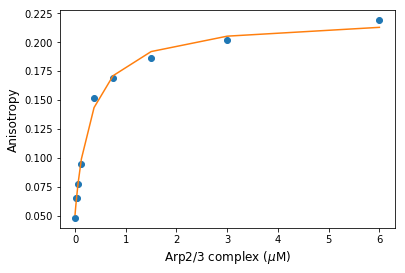

In [7]:
figure_handle, axes_handle = subplots()
axes_handle.plot(arp23_concentration_row, anisotropy_row, 'o')
axes_handle.plot(arp23_concentration_row, dna_anisotropy(arp23_concentration_row, *popt))
axes_handle.set_ylabel(r'Anisotropy', fontsize = 12)
axes_handle.set_xlabel(r'Arp2/3 complex ($\mu$M)', fontsize = 12)

In [8]:
from numpy import sqrt, diag
variance_row = sqrt(diag(pcov))
print(popt)
print(variance_row)

[0.3104173  0.05086761 0.22125078]
[0.04421392 0.00367007 0.00489962]
